In [ ]:
# ---------- Library Imports ----------
# Import libraries
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Mount my Google Drive to get the data
from google.colab import drive
drive.mount('/content/drive')

import zipfile
import os
from IPython.display import Image

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The number of images in the training dataset is:  9198
The number of images in the validation dataset is:  3094


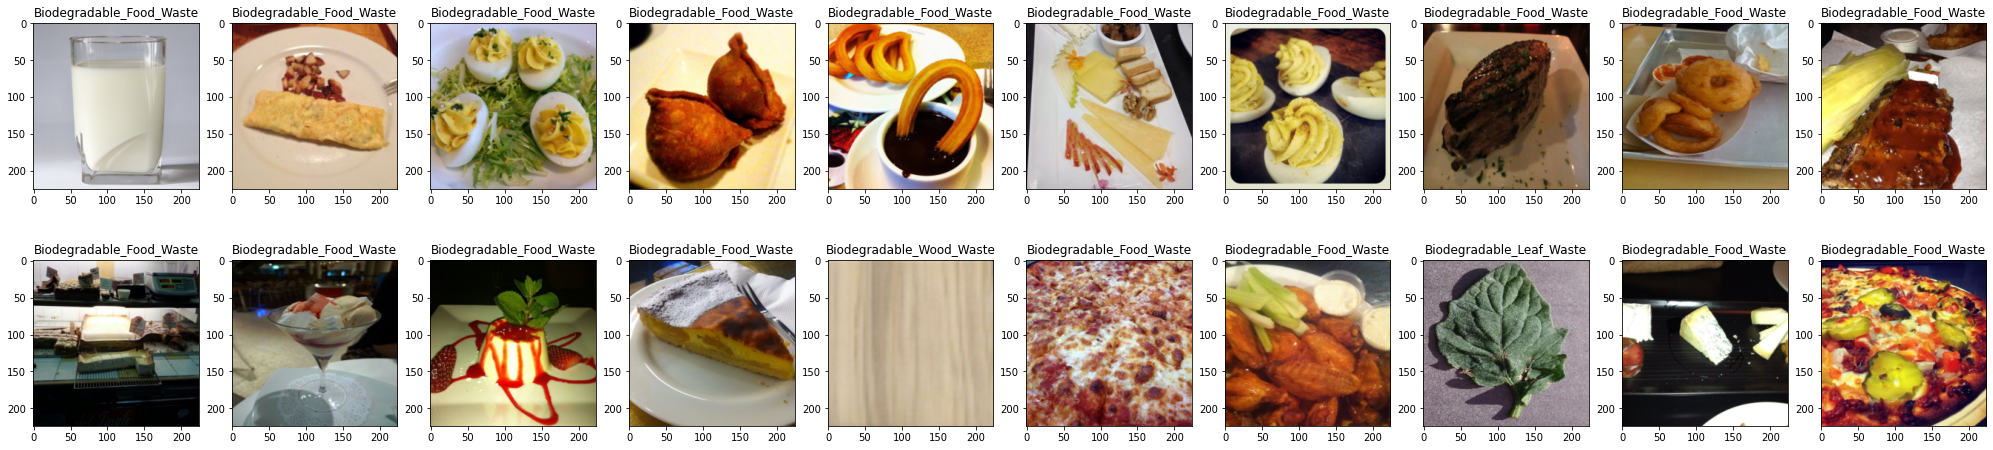

In [ ]:
# ---------- Process the data and ensure it successfully loads ----------

# Transform the data
transform_data = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])

# Get the training and validation data
train_data = torchvision.datasets.ImageFolder('/content/drive/MyDrive/Year 4/APS360/Project /Our_Split_Dataset/Training', transform=transform_data)
val_data = torchvision.datasets.ImageFolder('/content/drive/MyDrive/Year 4/APS360/Project /Our_Split_Dataset/Validation', transform=transform_data)

# Print the length of each set to verify with our manual cleansing
print('The number of images in the training dataset is: ', len(train_data))
print('The number of images in the validation dataset is: ', len(val_data))

# Load some of the train data just to verify the data is actually loaded
# Select an arbitrary batch size for sanity check sake
train_load = torch.utils.data.DataLoader(train_data, batch_size=20, num_workers=1, shuffle=True)
images, labels = iter(train_load).next()
images = images.numpy() 

# Folder names
folder = ['Biodegradable_Food_Waste', 
           'Biodegradable_Leaf_Waste', 
           'Biodegradable_Paper_Waste', 
           'Biodegradable_Wood_Waste', 
           'Non_Biodegradable_Electronic_Waste', 
           'Non_Biodegradable_Metal_Cans', 
           'Non_Biodegradable_Plastic_Bags', 
           'Non_Biodegradable_Plastic_Bottles']

# Plot the images
figure = plt.figure(figsize=(35, 8))
for i in np.arange(20):
    ax = figure.add_subplot(2, 10, i+1)
    ax.set_title(folder[labels[i]])
    plt.imshow(np.transpose(images[i], (1, 2, 0)))

In [ ]:
import pandas as pd

train_load = torch.utils.data.DataLoader(train_data, batch_size=5000, num_workers=1, shuffle=True)
images, labels = iter(train_load).next()
images = images.numpy() 

len(images)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


5000

In [ ]:
images.shape
labels.shape

images.shape
type(images)


numpy.ndarray

In [ ]:

images_for_rf = images.reshape(images.shape[0], images.shape[1]*images.shape[2]*images.shape[3])



In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=50)

clf.fit(images_for_rf, labels)


RandomForestClassifier(n_estimators=50)

In [ ]:
y_pred = clf.predict(images_for_rf)
len(y_pred)

score = 0
total = 0
for i, j in enumerate(y_pred):
  if y_pred[i] == labels[i]:
    score += 1
  total += 1
print("Accuracy is :" + str(float(score/total)))


Accuracy is :0.9998


In [ ]:
val_load = torch.utils.data.DataLoader(val_data, batch_size=800, num_workers=1, shuffle=True)
images_val, labels_val = iter(val_load).next()
images_val = images_val.numpy() 

len(images_val)

800

In [ ]:
images_val_for_rf = images_val.reshape(images_val.shape[0], images_val.shape[1]*images_val.shape[2]*images_val.shape[3])
images_val_for_rf.shape

(800, 150528)

In [ ]:
y_pred = clf.predict(images_val_for_rf)
len(y_pred)

score = 0
total = 0
for i, j in enumerate(y_pred):
  if y_pred[i] == labels_val[i]:
    score += 1
  total += 1
print("Accuracy is :" + str(float(score/total)))

Accuracy is :0.81375


In [ ]:
correct = []
guess = []
total = []

for i in folder:
  correct.append(0)
  guess.append(0)
  total.append(0)

for i, j in enumerate(y_pred):
  total[labels[i]] += 1
  guess[y_pred[i]] += 1
  if y_pred[i] == labels_val[i]:
    correct[y_pred[i]] += 1

#print("Accuracy is :" + str(float(score/total)))

In [ ]:
print("Accuracy is : " + str(float(sum(correct)/sum(total))))



Accuracy is : 0.81375


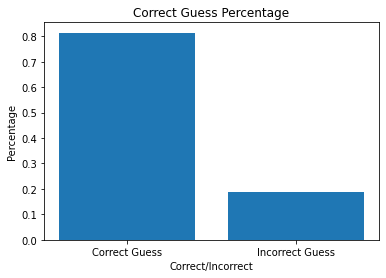

Accuracy is :  0.81375


In [ ]:
accuracy = float(sum(correct) / sum(total))
loss = 1 - accuracy

# x axis position of bars graph
pos = range(2)
# generate bar graph
plt.bar(pos, [accuracy, loss], align = 'center')
# provide labels for each bar based on provided positions
plt.xticks(pos,['Correct Guess', 'Incorrect Guess'])
plt.title('Correct Guess Percentage')
plt.xlabel('Correct/Incorrect')
plt.ylabel('Percentage')
plt.show()
print("Accuracy is : " , accuracy)

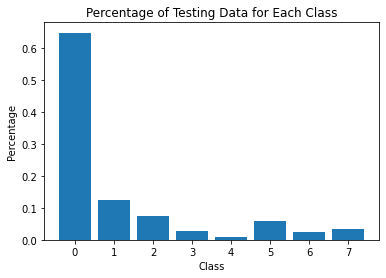

Biodegradable_Food_Waste is 0 on the xaxis.
Biodegradable_Leaf_Waste is 1 on the xaxis.
Biodegradable_Paper_Waste is 2 on the xaxis.
Biodegradable_Wood_Waste is 3 on the xaxis.
Non_Biodegradable_Electronic_Waste is 4 on the xaxis.
Non_Biodegradable_Metal_Cans is 5 on the xaxis.
Non_Biodegradable_Plastic_Bags is 6 on the xaxis.
Non_Biodegradable_Plastic_Bottles is 7 on the xaxis.


In [ ]:

total_percentage = []

for i in total:
  total_percentage.append(i/sum(total)) 

# x axis position of bars graph
pos = range(len(total_percentage))
# generate bar graph
plt.bar(pos, total_percentage, align = 'center')
# provide labels for each bar based on provided positions
plt.xticks(pos,pos)
plt.title('Percentage of Testing Data for Each Class')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.show()

for i in range(len(folder)):
  print(folder[i] + " is " + str(i) + " on the xaxis.")
#print("Accuracy is : " , accuracy)

[0.77, 0.09, 0.05, 0.03, 0.0, 0.05875, 0.0, 0.00125]
[0.64875, 0.12375, 0.07375, 0.02875, 0.00875, 0.05875, 0.02375, 0.03375]


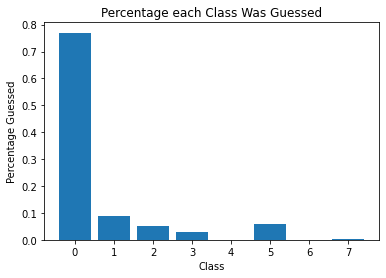

Biodegradable_Food_Waste is 0 on the xaxis.
Biodegradable_Leaf_Waste is 1 on the xaxis.
Biodegradable_Paper_Waste is 2 on the xaxis.
Biodegradable_Wood_Waste is 3 on the xaxis.
Non_Biodegradable_Electronic_Waste is 4 on the xaxis.
Non_Biodegradable_Metal_Cans is 5 on the xaxis.
Non_Biodegradable_Plastic_Bags is 6 on the xaxis.
Non_Biodegradable_Plastic_Bottles is 7 on the xaxis.


In [ ]:

guessed_percentage = []

for i in guess:
  guessed_percentage.append(i/sum(guess)) 

print(guessed_percentage)
print(total_percentage)
# x axis position of bars graph
pos = range(len(guessed_percentage))
# generate bar graph
plt.bar(pos, guessed_percentage, align = 'center')
# provide labels for each bar based on provided positions
plt.xticks(pos,pos)
plt.title('Percentage each Class Was Guessed')
plt.xlabel('Class')
plt.ylabel('Percentage Guessed')
plt.show()

for i in range(len(folder)):
  print(folder[i] + " is " + str(i) + " on the xaxis.")

[616, 72, 40, 24, 0, 47, 0, 1] [531, 65, 21, 23, 0, 11, 0, 0]
[0.862012987012987, 0.9027777777777778, 0.525, 0.9583333333333334, 0, 0.23404255319148937, 0, 0.0]
[0.64875, 0.12375, 0.07375, 0.02875, 0.00875, 0.05875, 0.02375, 0.03375]


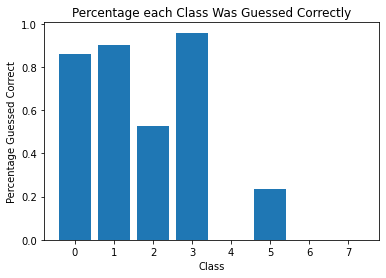

Biodegradable_Food_Waste is 0 on the xaxis.
Biodegradable_Leaf_Waste is 1 on the xaxis.
Biodegradable_Paper_Waste is 2 on the xaxis.
Biodegradable_Wood_Waste is 3 on the xaxis.
Non_Biodegradable_Electronic_Waste is 4 on the xaxis.
Non_Biodegradable_Metal_Cans is 5 on the xaxis.
Non_Biodegradable_Plastic_Bags is 6 on the xaxis.
Non_Biodegradable_Plastic_Bottles is 7 on the xaxis.


In [ ]:
from tables.utils import correct_byteorder
correct_percentage = []

for i in range(len(correct)):
  if guess[i] == 0:
    correct_percentage.append(0)
  else:
    correct_percentage.append(correct[i]/guess[i]) 

print(guess, correct)
print(correct_percentage)
print(total_percentage)

# x axis position of bars graph
pos = range(len(correct_percentage))
# generate bar graph
plt.bar(pos, correct_percentage, align = 'center')
# provide labels for each bar based on provided positions
plt.xticks(pos,pos)
plt.title('Percentage each Class Was Guessed Correctly')
plt.xlabel('Class')
plt.ylabel('Percentage Guessed Correct')
plt.show()

for i in range(len(folder)):
  print(folder[i] + " is " + str(i) + " on the xaxis.")

